In [7]:
import warnings
warnings.filterwarnings('ignore')

#'pandas' is used for data manipulation and analysis
import pandas as pd

#'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

#'Matplotlib' is a data visualization library for 2D and 3D plots,built on numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import various functions to perform classifications
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost # Add this line to import the main xgboost module
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import imblearn # Add this line to import the main imblearn module
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [2]:
import pandas as pd

df = pd.read_csv("/content/xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
col=['Class']
for i in col:
  print(df[i].value_counts())

Class
M    211
H    142
L    127
Name: count, dtype: int64


In [ ]:
col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class']
for i in col:
  print(df[i].value_counts())

gender
M    305
F    175
Name: count, dtype: int64
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64
SectionID
A    283
B    167
C     30
Name: count, dtype: int64
Topic
IT           95
French 

In [ ]:
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Class'].value_counts()


,count
Class,
M,211
H,142
L,125


In [ ]:
df.Class.value_counts(normalize=True)


,proportion
Class,
M,0.441423
H,0.297071
L,0.261506


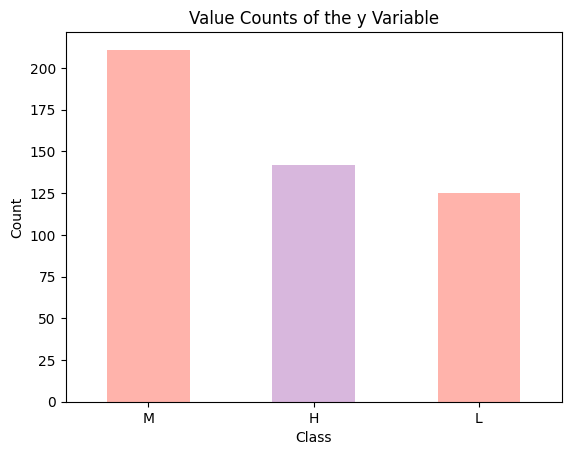

In [5]:

df['Class'].value_counts().plot(kind="bar", color= ['#FFB3AB','#D8B7DD'])
plt.title("Value Counts of the y Variable")
plt.xlabel("Class")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

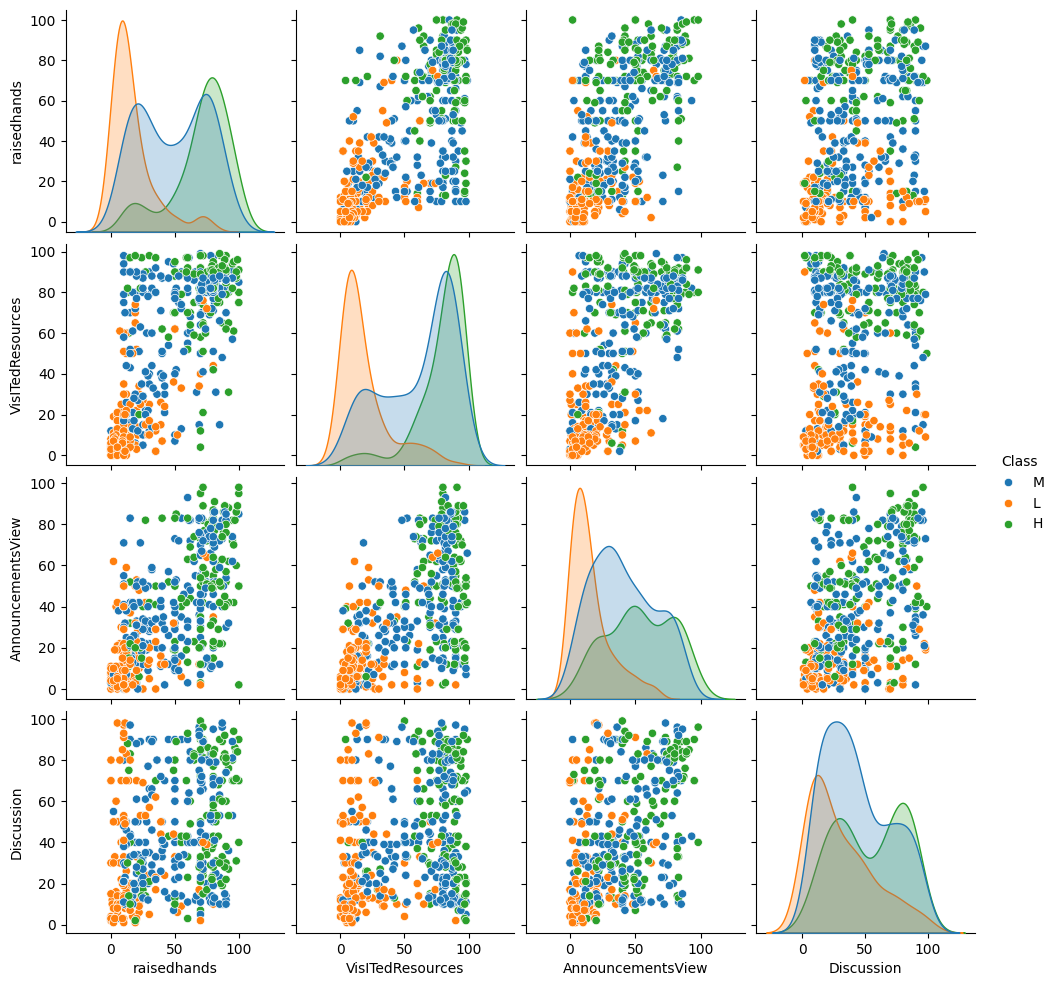

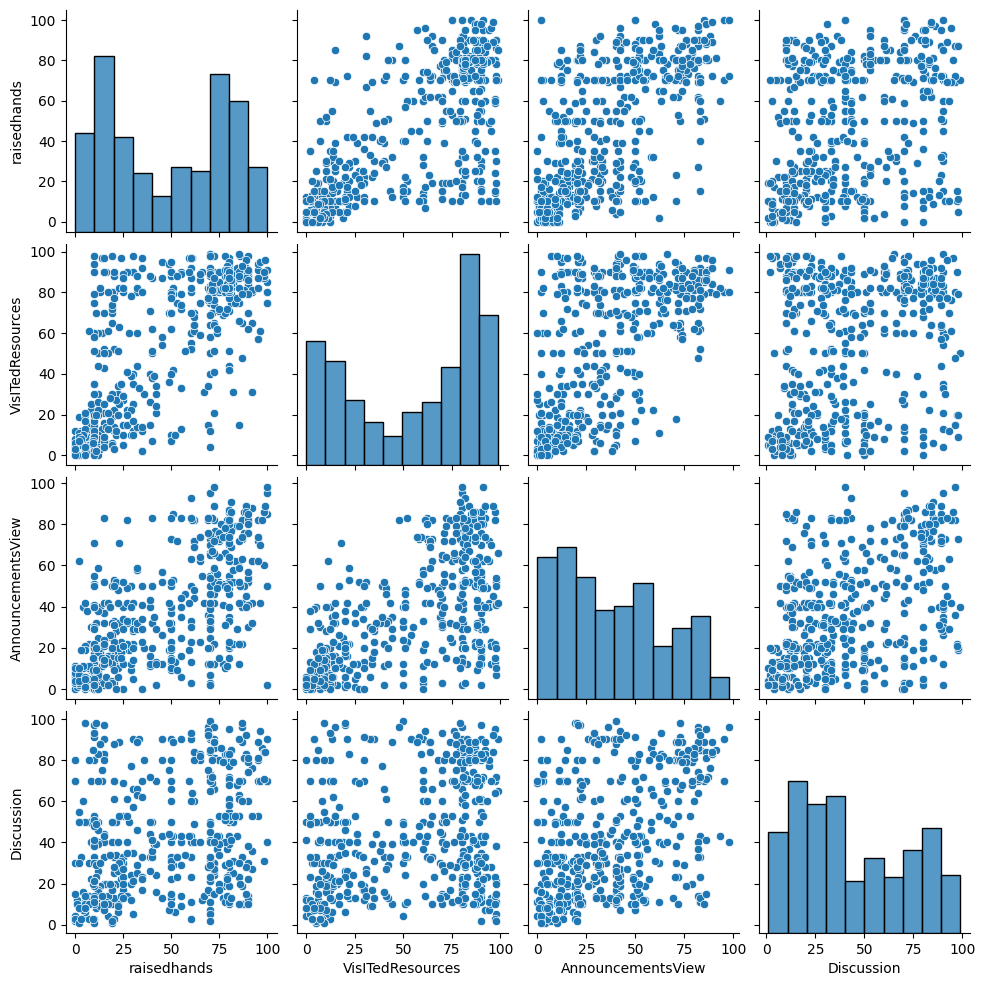

In [6]:
import seaborn as sns

"""### Relationship Between Variables"""

sns.pairplot(df, hue = "Class")
sns.pairplot(df)

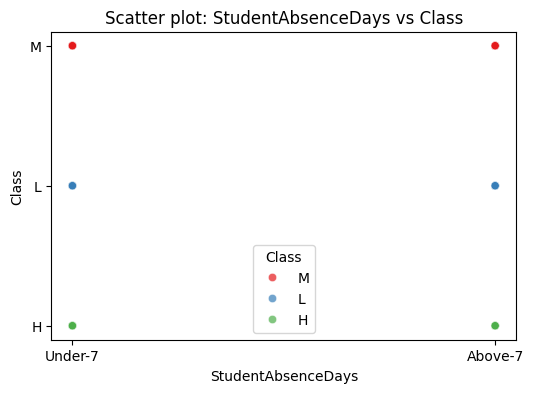

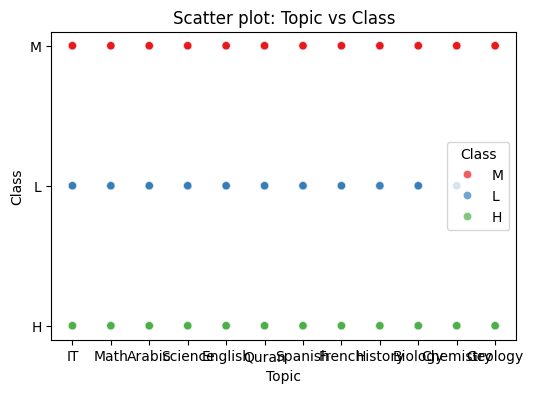

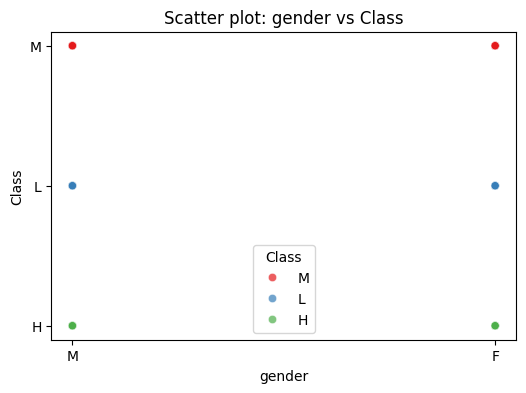

In [8]:
"""### Scatterplot → numeric vs numeric"""

numeric_cols = ['StudentAbsenceDays', 'Topic', 'gender']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Class', data=df, hue='Class', palette="Set1", alpha=0.7)
    plt.title(f"Scatter plot: {col} vs Class")
    plt.show()

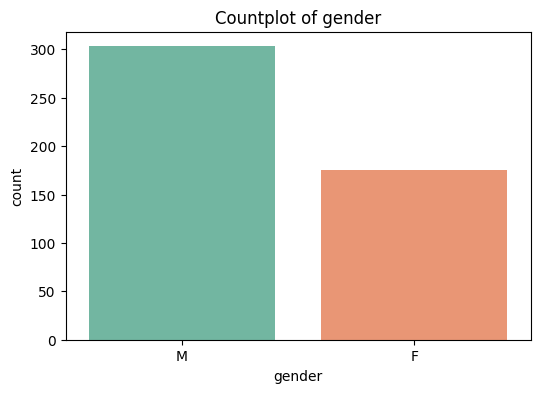

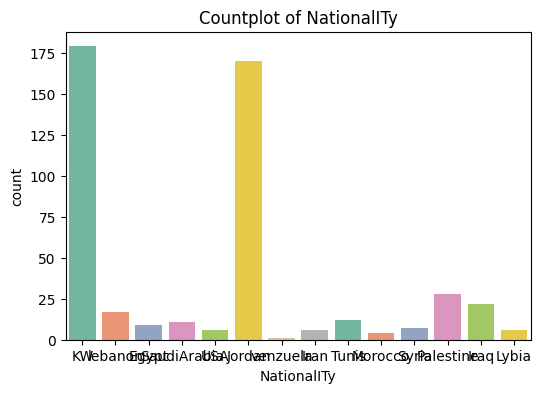

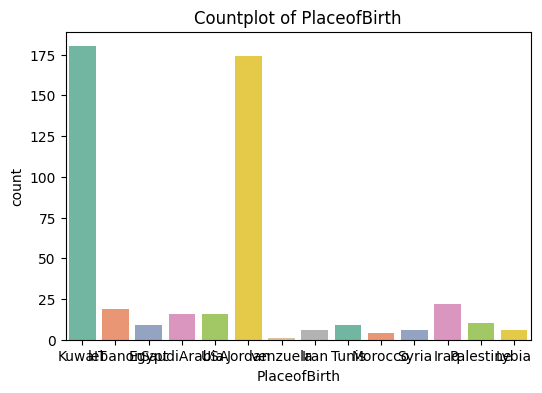

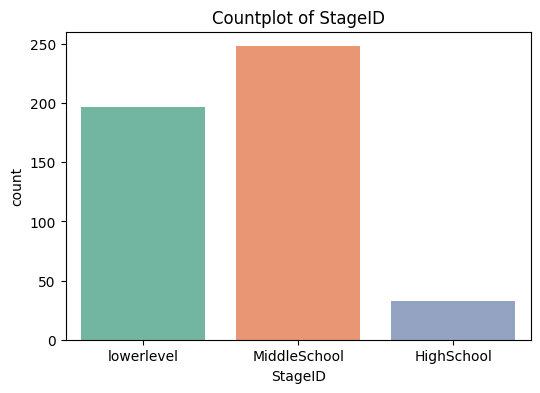

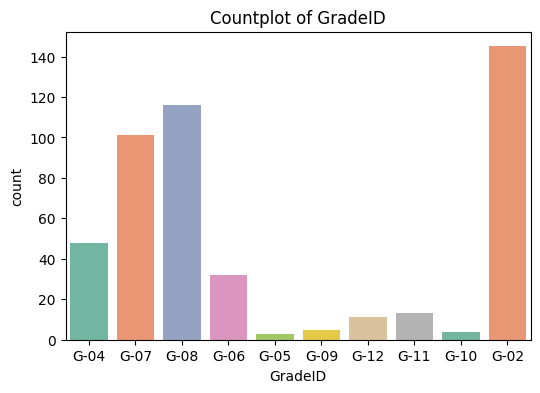

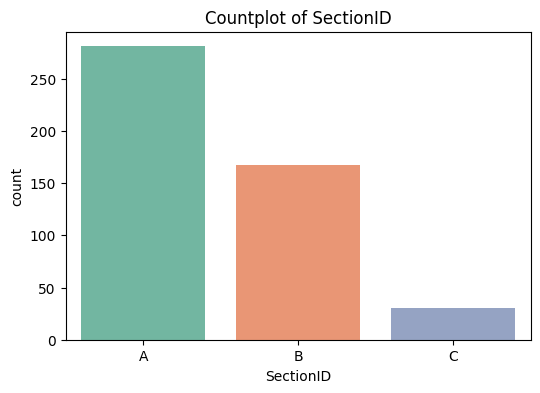

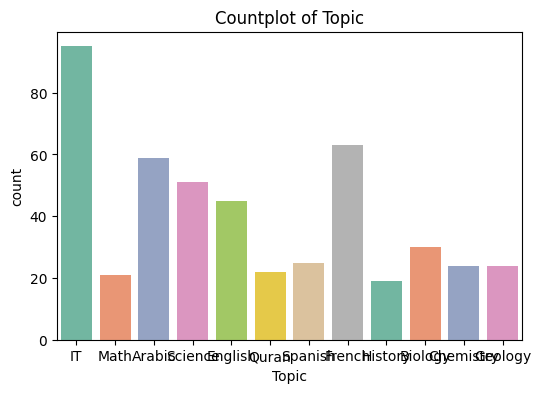

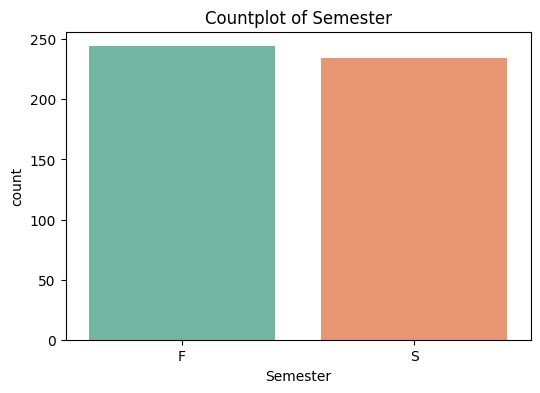

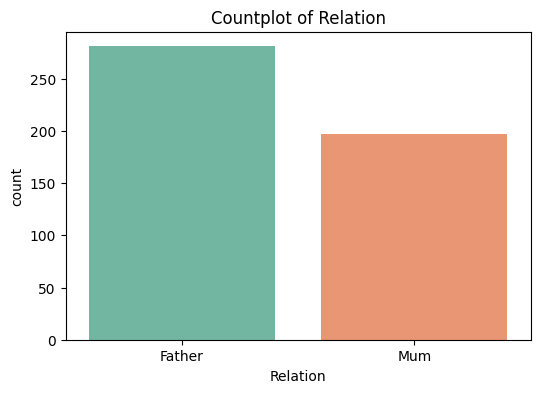

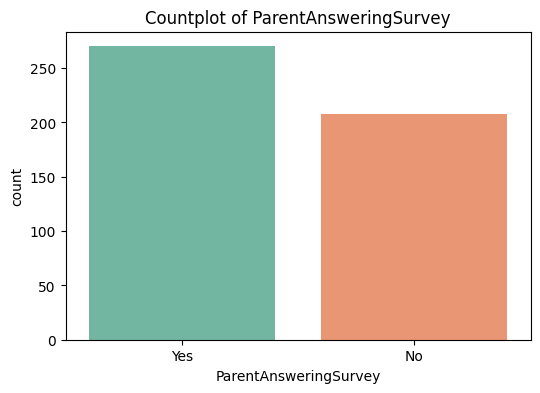

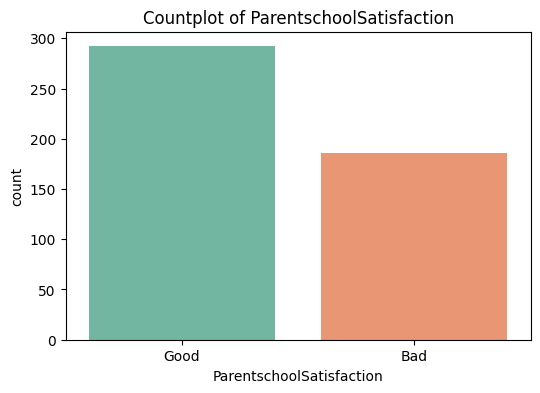

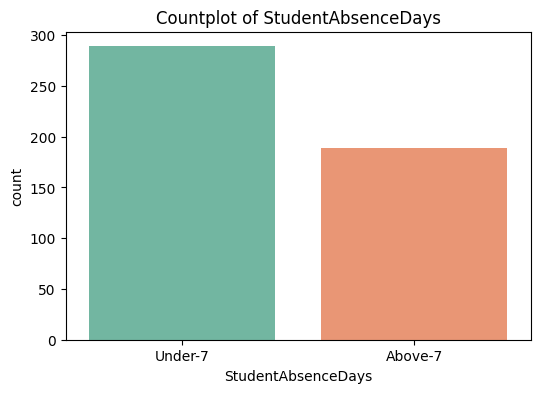

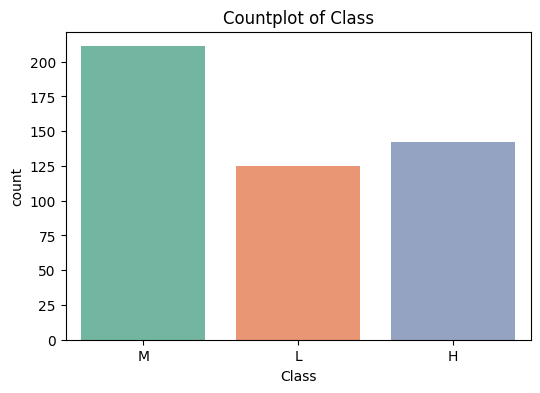

In [9]:
"""### Countplot → categorical only"""

categorical_cols = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.show()

In [10]:
""### Sigmoid Function Curve"""

# Range
lim = 6
t = np.linspace(-lim, lim, 100)


In [11]:
# Sigmoid Function
sig = 1 / (1 + np.exp(-t))


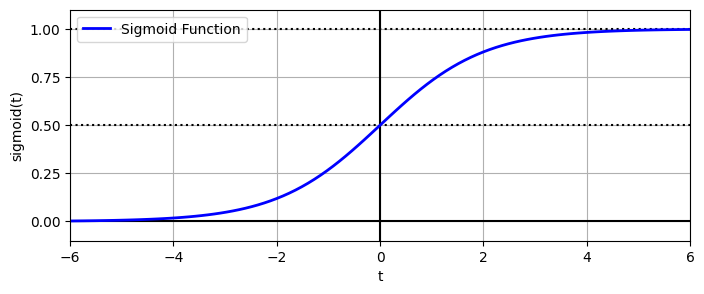

In [12]:
# Plot
plt.figure(figsize=(8, 3))

plt.plot([-lim, lim], [0, 0], "k-")       # horizontal axis line
plt.plot([-lim, lim], [0.5, 0.5], "k:")   # dotted line at 0.5
plt.plot([-lim, lim], [1, 1], "k:")       # dotted line at 1
plt.plot([0, 0], [-1.1, 1.1], "k-")       # vertical axis line

plt.plot(t, sig, "b-", linewidth=2, label="Sigmoid Function")

plt.xlabel("t")
plt.ylabel("sigmoid(t)")
plt.legend(loc="upper left")

plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()


Student Class Distribution:
Class
H    142
L    125
M    211
Name: count, dtype: int64


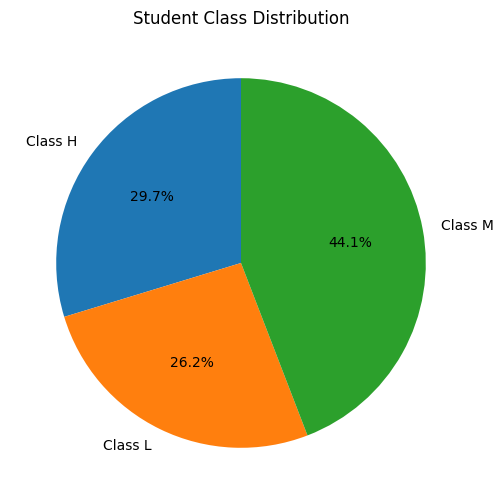

In [14]:
"""###Pie Chart"""

satisfaction_counts = df['Class'].value_counts().sort_index()

print("Student Class Distribution:")
print(satisfaction_counts)

# Pie Chart
plt.figure(figsize=(6,6))

# Map numerical labels back to original string representations for better readability
# Based on earlier value counts and LabelEncoder behavior: 0->H, 1->L, 2->M
class_mapping = {
    0: 'High Level (H)',
    1: 'Low Level (L)',
    2: 'Middle Level (M)'
}
labels = [class_mapping.get(idx, f'Class {idx}') for idx in satisfaction_counts.index]


plt.pie(satisfaction_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Student Class Distribution") # Changed title to reflect the plotted data
plt.show()

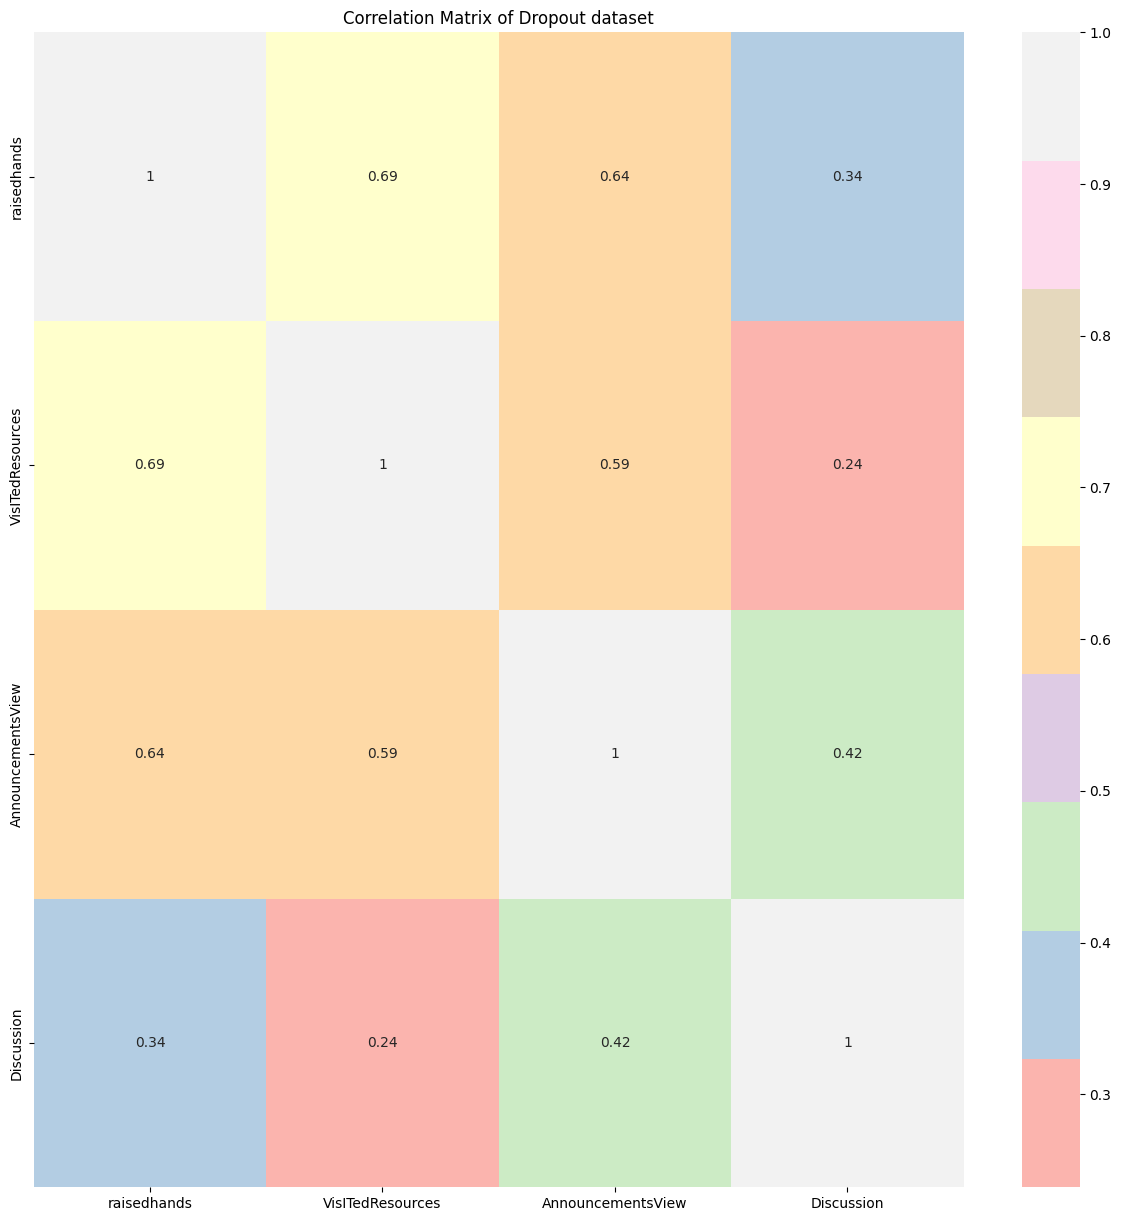

In [13]:
"""### Correlation Matrix"""

plt.figure(figsize=(15,15))
correlation_matrix =df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Matrix of Dropout dataset')
plt.show()


In [18]:
df.select_dtypes(include=['number']).corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.690635,0.642730,0.337300
VisITedResources,0.690635,1.000000,0.592948,0.238790
AnnouncementsView,0.642730,0.592948,1.000000,0.415355
Discussion,0.337300,0.238790,0.415355,1.000000


In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
num_cols = [
    "raisedhands",
    "VisITedResources",
    "AnnouncementsView",
    "Discussion"
]

cat_cols = [
    "gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID",
    "SectionID", "Topic", "Semester", "Relation",
    "ParentAnsweringSurvey", "ParentschoolSatisfaction",
    "StudentAbsenceDays"
]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


In [24]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [25]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Ensure num_cols, cat_cols, and preprocessor are defined if they were not executed previously
# (Assuming they were defined in a previous cell, but re-defining them here for robustness)
num_cols = [
    "raisedhands",
    "VisITedResources",
    "AnnouncementsView",
    "Discussion"
]

cat_cols = [
    "gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID",
    "SectionID", "Topic", "Semester", "Relation",
    "ParentAnsweringSurvey", "ParentschoolSatisfaction",
    "StudentAbsenceDays"
]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Assuming X_train, X_test, y_train, y_test are already defined from previous cells
# If not, ensure they are defined by running the data splitting cells prior to this one.

# Apply preprocessing to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train).toarray() # Convert to dense array
X_test_processed = preprocessor.transform(X_test).toarray()     # Convert to dense array

# Encode categorical target variable y
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

models = {
    "                   Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(random_state=42),
    "                          RandomForest": RandomForestClassifier(random_state=42),
    "                    XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "                    Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}


for name, model in models.items():
    # Fit models with processed X and encoded y
    model.fit(X_train_processed, y_train_encoded)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.
                    XGBoost Classifier trained.
                    Decision Tree Classifier trained.


In [37]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test_processed, y_test_encoded) * 100))

                   Logistic Regression: 72.92%
                  Gaussian Naive Bayes: 57.29%
                   K-Nearest Neighbors: 70.83%
                Support Vector Machine: 76.04%
                          RandomForest: 81.25%
                    XGBoost Classifier: 78.12%
                    Decision Tree Classifier: 69.79%


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = {}   # to store all model scores

for name, model in models.items():
    # Models are already trained in the previous cell (eQquhIeHZ6Jg)
    # Predict using the processed test data
    y_pred = model.predict(X_test_processed)

    # Metrics using the encoded true labels and predictions
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    print("====================================================")
    print(f"Model: {name}")
    # For classification_report and confusion_matrix, use encoded y_test
    print(classification_report(y_test_encoded, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
    print("====================================================\n")

# Display sorted results
print("\n\n======= MODEL PERFORMANCE SUMMARY =======\n")

for name, metrics in sorted(results.items(), key=lambda x: x[1]["Accuracy"], reverse=True):
    print(f"{name}: "
          f"Accuracy={metrics['Accuracy']:.4f}, "
          f"Precision={metrics['Precision']:.4f}, "
          f"Recall={metrics['Recall']:.4f}, "
          f"F1 Score={metrics['F1 Score']:.4f}")

Model:                    Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.76      0.88      0.81        25
           2       0.70      0.67      0.68        42

    accuracy                           0.73        96
   macro avg       0.73      0.75      0.74        96
weighted avg       0.73      0.73      0.73        96

Confusion Matrix:
 [[20  0  9]
 [ 0 22  3]
 [ 7  7 28]]

Model:                   Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        29
           1       0.54      1.00      0.70        25
           2       0.86      0.14      0.24        42

    accuracy                           0.57        96
   macro avg       0.65      0.66      0.54        96
weighted avg       0.69      0.57      0.49        96

Confusion Matrix:
 [[24  4  1]
 [ 0 25  0]
 [19 17  6]]

Model:                    K-Near

Confusion Matrix
[[20  0  9]
 [ 0 22  3]
 [ 7  7 28]]


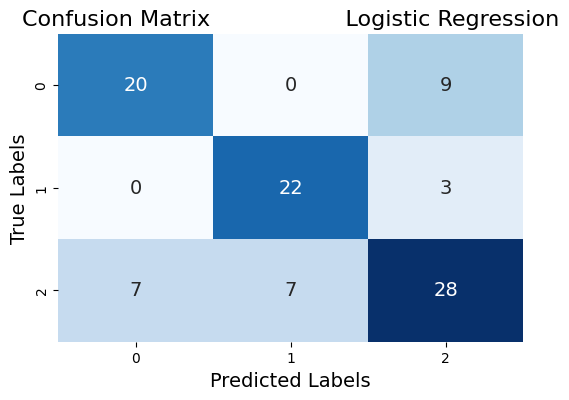

Confusion Matrix
[[24  4  1]
 [ 0 25  0]
 [19 17  6]]


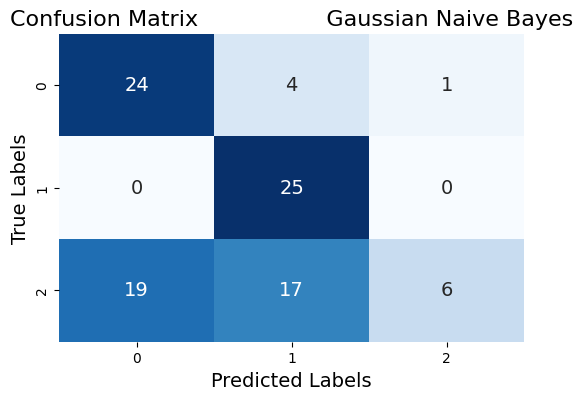

Confusion Matrix
[[22  0  7]
 [ 0 22  3]
 [ 9  9 24]]


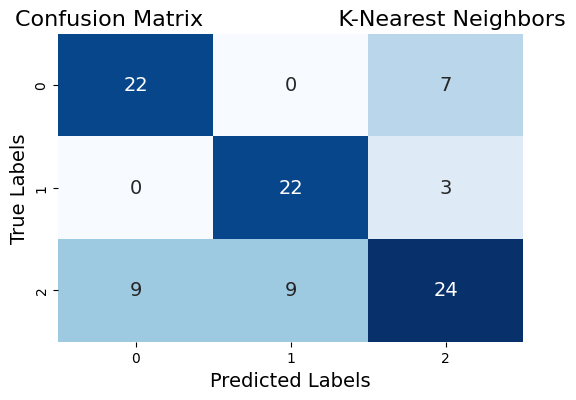

Confusion Matrix
[[20  0  9]
 [ 0 21  4]
 [ 7  3 32]]


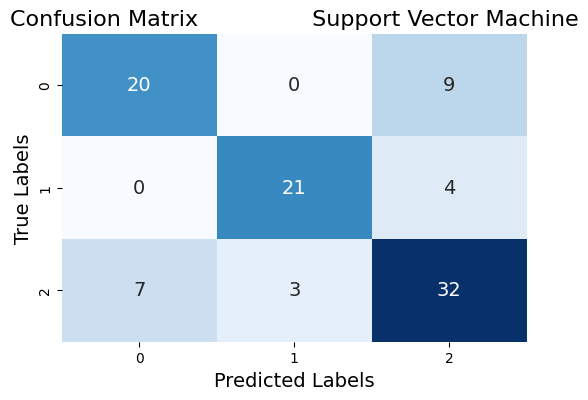

Confusion Matrix
[[22  0  7]
 [ 0 22  3]
 [ 3  5 34]]


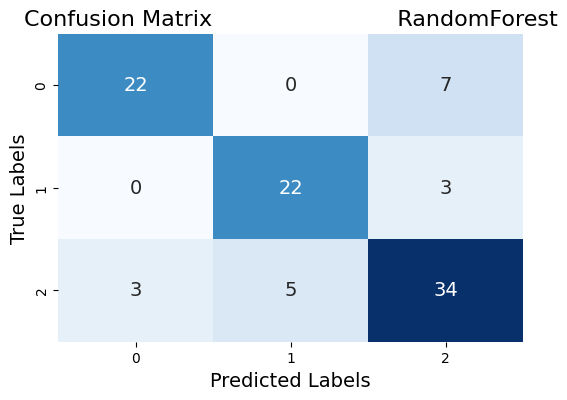

Confusion Matrix
[[19  0 10]
 [ 0 22  3]
 [ 4  4 34]]


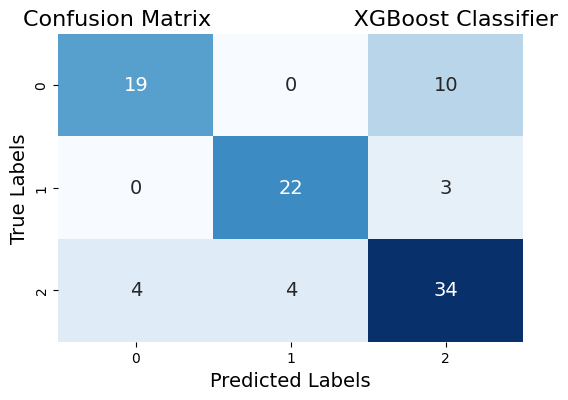

Confusion Matrix
[[19  0 10]
 [ 1 20  4]
 [ 4 10 28]]


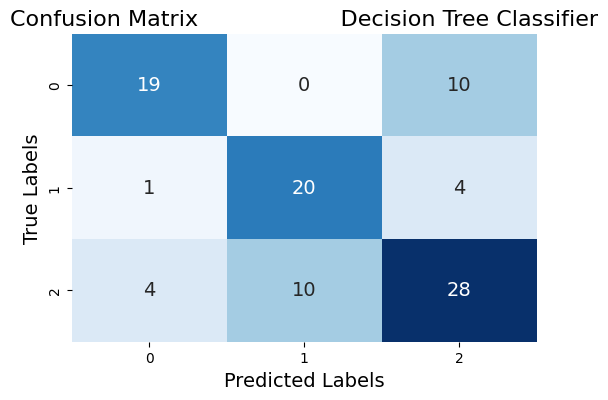

In [41]:
for name, model in models.items():
  # Use the processed test features for prediction
  y_pred = model.predict(X_test_processed)

  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  # Use the encoded true labels and predicted labels for the confusion matrix
  cm = confusion_matrix(y_test_encoded, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title(f'Confusion Matrix{name}', fontsize = 16)
  plt.show()

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8125
              precision    recall  f1-score   support

           H       0.88      0.76      0.81        29
           L       0.81      0.88      0.85        25
           M       0.77      0.81      0.79        42

    accuracy                           0.81        96
   macro avg       0.82      0.82      0.82        96
weighted avg       0.82      0.81      0.81        96



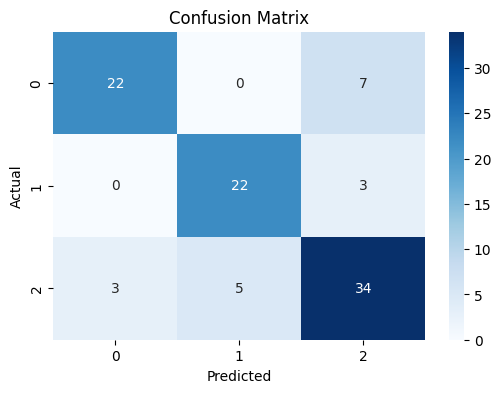

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
from sklearn.metrics import classification_report

# Assuming y_pred from the last model trained in the loop (Decision Tree Classifier) is intended
# If a specific model's y_pred is desired, it should be explicitly set.
# For consistency with previous cells, we'll use y_test_encoded.
report = (classification_report(y_test_encoded, y_pred))
print(report)

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        29
           1       0.67      0.80      0.73        25
           2       0.67      0.67      0.67        42

    accuracy                           0.70        96
   macro avg       0.71      0.71      0.70        96
weighted avg       0.70      0.70      0.70        96



In [45]:
# The 'model' variable is currently the last model from the loop in eQquhIeHZ6Jg, which is DecisionTreeClassifier.
# This model was trained on X_train_processed and y_train_encoded.
# Therefore, for prediction, we should use X_test_processed.

# No need to re-fit, the model is already trained from the loop in eQquhIeHZ6Jg
# model.fit(X_train, y_train) # This line caused the error

y_pred_encoded = model.predict(X_test_processed)

# Inverse transform y_pred_encoded to get original class labels for comparison
y_pred_original = le.inverse_transform(y_pred_encoded)

# Create DataFrame using original y_test and inverse-transformed predictions
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_original})
print("\nActual vs Predicted:\n", results.head(20))


Actual vs Predicted:
     Actual Predicted
479      L         L
336      M         H
386      M         M
339      M         M
65       L         M
262      M         L
118      M         M
223      H         H
110      H         M
475      L         L
170      H         M
463      M         M
82       L         L
376      M         L
160      H         H
195      M         M
102      L         L
433      M         M
404      H         H
241      M         M


In [46]:
import pickle
# with open('model.pkl','wb') as f:
# pickle.dump(model, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [47]:
print("\nSaved best pipeline to 'satisfaction_best_pipeline.pickle'")


Saved best pipeline to 'satisfaction_best_pipeline.pickle'


Students are at risk of dropout mainly due to low academic engagement and poor attendance. Factors such as frequent absences, low participation in class activities, limited use of learning resources, and weak parental support reduce motivation and performance. Over time, these issues lead to falling grades, loss of interest, and a higher likelihood of dropping out.